In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os 

In [2]:
A = [1E-8, 1E-7, 1E-6, 1E-5, 1E-4, 1E-3, 1E-2, 1E-1]
Angle = [a*1.0 for a in range(0, 361, 15)]

In [3]:
Data_end = pd.DataFrame(columns=['A', 'Angle', 'MeanLoss'], dtype=np.float64)
Data_begin = pd.DataFrame(columns=['A', 'Angle', 'MeanLoss'], dtype=np.float64)

pth = "../log/Harmonic_Piezo_TrussNe:8/m:0.001/k:10000.0/omega:10/xi:0.2/gamma:0.0001/C:1e-07/W_seed:0/G_seed:0/C_seed:0/V_seed:1/lr:1000000000.0/Vr:10/Vi:1/Ep:20000/Vm:0.0/"
A_dir = os.listdir(pth)
for a in A_dir:
    amp = float(a[2:])
    Angle_dir = os.listdir(pth+a)
    for Angle in Angle_dir:
        angle = float(Angle[6:])
        pth_temp = pth+a+'/'+Angle + '/'
        pth_temp += os.listdir(pth_temp)[0]
        try:
            data = np.load(pth_temp+'/loss.npz')['loss']
        except:
            print('Not found: {}'.format(pth_temp))
            continue
        Data_end =pd.concat([Data_end, pd.DataFrame({'A':amp, 'Angle':angle, 'MeanLoss':data[-1000:].mean()}, index=[0])], ignore_index=True)
        Data_begin =pd.concat([Data_begin, pd.DataFrame({'A':amp, 'Angle':angle, 'MeanLoss':data[:1000].mean()}, index=[0])], ignore_index=True)
        
        # else:
        #     print('Not found: {}'.format(pth))

In [4]:
display(Data_begin)

,A,Angle,MeanLoss
0,0.000006,282.0,0.633864
1,0.000006,278.0,0.636417
2,0.000006,25.0,0.604706
3,0.000006,63.0,0.621015
4,0.000006,273.0,0.639615
...,...,...,...
193,0.080000,299.0,0.632296
194,0.000005,284.0,0.634411
195,0.000005,43.0,0.608374
196,0.000005,16.0,0.598686


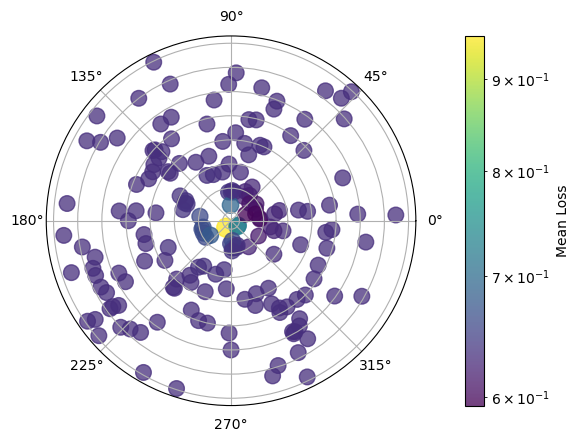

In [8]:
# Fixing random state for reproducibility

# Compute areas and colors
theta = Data_begin['Angle'].values / 180 * np.pi
r = Data_begin['A'].values
colors = Data_begin['MeanLoss'].values
area = Data_begin['MeanLoss'].values*200

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
# r log scale
ax.set_rscale('log')
c = ax.scatter(theta, r, c=colors, s=area, alpha=0.75, norm=mpl.colors.LogNorm(), cmap='viridis')
plt.colorbar(c, ax=ax, label='Mean Loss', pad=0.1)
#remove r label
ax.set_yticklabels([])
plt.show()



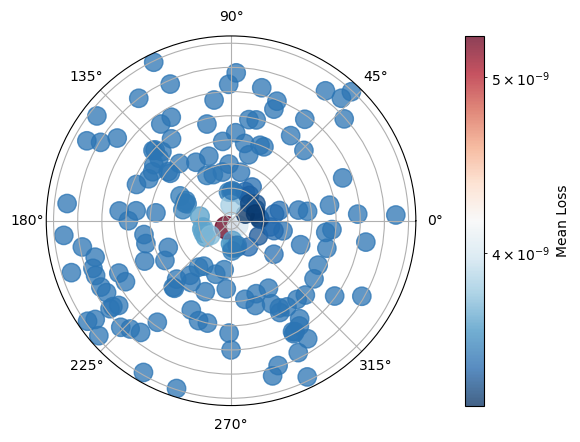

In [7]:
# Fixing random state for reproducibility

# Compute areas and colors
theta = Data_end['Angle'].values / 180 * np.pi
r = Data_end['A'].values
colors = Data_end['MeanLoss'].values
area = Data_end['MeanLoss'].values*5e10

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
# r log scale
ax.set_rscale('log')
c = ax.scatter(theta, r, c=colors, s=area, alpha=0.75, norm=mpl.colors.LogNorm(), cmap='RdBu_r')
plt.colorbar(c, ax=ax, label='Mean Loss', pad=0.1)
#remove r label
ax.set_yticklabels([])
plt.show()

